# Шавель 853501 Лабораторная работа № 1

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import bisect

n = 5
m = 4
samples_cnt = 10000
mat = np.random.rand(n, m)
x_vals = np.arange(n)
y_vals = np.arange(m)

def normalize(mat):
    mat_sum = mat.sum()
    return np.vectorize(lambda val: val / mat_sum)(mat)

mat = normalize(mat)

row_prefix_sum = np.zeros(n)
col_prefix_sum = np.zeros((n, m))
for i in range(0, n):
    if i != 0:
        row_prefix_sum[i] = row_prefix_sum[i - 1] + mat[i - 1].sum()
    col_prefix_sum[i][0] = row_prefix_sum[i]
    for j in range(1, m):
        col_prefix_sum[i][j] = col_prefix_sum[i][j - 1] + mat[i][j - 1]

def gen_value():
    rnd = np.random.random()
    row_index = bisect.bisect(row_prefix_sum, rnd) - 1
    col_index = bisect.bisect(col_prefix_sum[row_index], rnd) - 1
    return (row_index, col_index)

def samp_mat():
    samp_mat = np.zeros(mat.shape)
    for _ in range(samples_cnt):
        val = gen_value()
        samp_mat[val[0]][val[1]] += 1
    return samp_mat

emp_mat = normalize(samp_mat())
print("Теоретическая матрица распределения:\n", mat)
print("Эмпирическая матрица распределения:\n", emp_mat)

Теоретическая матрица распределения:
 [[0.02104111 0.02842739 0.08987048 0.08179831]
 [0.09211855 0.01194809 0.06845811 0.04516698]
 [0.08375862 0.07842969 0.04012108 0.09045701]
 [0.02169318 0.0147377  0.03452913 0.07696934]
 [0.05423776 0.03842632 0.01656127 0.01124987]]
Эмпирическая матрица распределения:
 [[0.0197 0.0291 0.0862 0.0801]
 [0.0965 0.0131 0.0693 0.0443]
 [0.0865 0.0756 0.0388 0.0943]
 [0.022  0.0139 0.0353 0.0759]
 [0.0546 0.0381 0.0174 0.0093]]


Теоретический heatmap


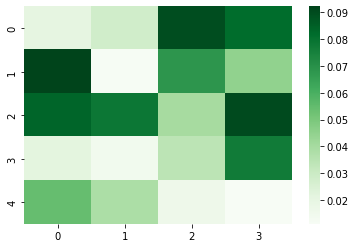

Эмпирический heatmap


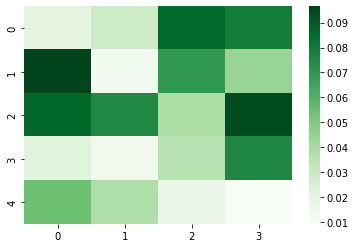

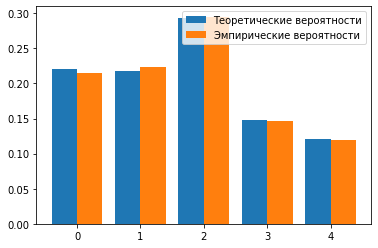

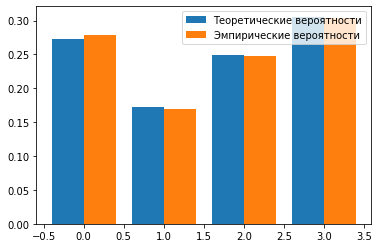

In [129]:
def histograms(mat, emp_mat):
    mat_prob_x, mat_prob_y = np.sum(mat, axis=1), np.sum(mat, axis=0)
    emp_prob_x, emp_prob_y = np.sum(emp_mat, axis=1), np.sum(emp_mat, axis=0)
    
    print("Теоретический heatmap")
    sns.heatmap(mat, cmap='Greens')
    plt.show()
    
    print("Эмпирический heatmap")
    sns.heatmap(emp_mat, cmap='Greens')
    plt.show()
    
    width = 0.4
    
    plt.bar(x_vals - width / 2, mat_prob_x, width, label="Теоретические вероятности")
    plt.bar(x_vals + width / 2, emp_prob_x, width, label="Эмпирические вероятности")
    plt.legend()
    plt.show()
    
    plt.bar(y_vals - width / 2, mat_prob_y, width, label="Теоретические вероятности")
    plt.bar(y_vals + width / 2, emp_prob_y, width, label="Эмпирические вероятности")
    plt.legend()
    plt.show()
    
histograms(mat, emp_mat)

In [130]:
def expectation(mat):
    exp_x = 0
    exp_y = 0
    for i in range(n):
        for j in range(m):
            exp_x += mat[i][j] * x_vals[i]
            exp_y += mat[i][j] * y_vals[j]
    return (exp_x, exp_y)

print("Теоретическое матожидание: ", expectation(mat))
print("Эмпирическое матожидание: ", expectation(emp_mat))

Теоретическое матожидание:  (1.7289134781116335, 1.5879738783880677)
Эмпирическое матожидание:  (1.7325, 1.5755000000000001)


In [131]:
def variance(mat):
    (exp_x, exp_y) = expectation(mat)
    exp_x_sq = 0
    exp_y_sq = 0
    for i in range(n):
        for j in range(m):
            exp_x_sq += mat[i][j] * (x_vals[i] ** 2)
            exp_y_sq += mat[i][j] * (y_vals[j] ** 2)
    return (exp_x_sq - exp_x ** 2, exp_y_sq - exp_y ** 2)

print("Теоретическая дисперсия: ", variance(mat))
print("Эмпирическая дисперсия: ", variance(emp_mat))

Теоретическая дисперсия:  (1.6585832165693328, 1.3992420504315999)
Эмпирическая дисперсия:  (1.6367437499999995, 1.41069975)


In [132]:
def interval_expectation(mat, p):
    (exp_x, exp_y) = expectation(mat)
    (var_x, var_y) = variance(mat)
    dx = stats.norm.ppf(1 - p / 2) * np.sqrt(var_x) / np.sqrt(samples_cnt)
    dy = stats.norm.ppf(1 - p / 2) * np.sqrt(var_y) / np.sqrt(samples_cnt)
    return ((exp_x - dx, exp_x + dx), (exp_y - dy, exp_y + dy))

def interval_variance(mat, p):
    (var_x, var_y) = variance(mat)
    lx = samples_cnt * var_x / stats.chi2.ppf(1 - p / 2, samples_cnt - 1)
    rx = samples_cnt * var_x / stats.chi2.ppf(p / 2, samples_cnt - 1)
    ly = samples_cnt * var_y / stats.chi2.ppf(1 - p / 2, samples_cnt - 1)
    ry = samples_cnt * var_y / stats.chi2.ppf(p / 2, samples_cnt - 1)
    return ((lx, rx), (ly, ry))
    
    
p = 0.05
print("Доверительные интервалы матожидания:\n", interval_expectation(emp_mat, p))
print("Доверительные интервалы дисперсии:\n", interval_variance(emp_mat, p))

Доверительные интервалы матожидания:
 ((1.7074251446352058, 1.757574855364794), (1.5522209428928309, 1.5987790571071694))
Доверительные интервалы дисперсии:
 ((1.5924642743727262, 1.6832464223659558), (1.3725355320535282, 1.4507801280561168))


In [133]:
def correlation(mat):
    cov_xy = 0
    for i in range(n):
        for j in range(m):
            cov_xy += mat[i][j] * x_vals[i] * y_vals[j]
    (exp_x, exp_y) = expectation(mat)
    (var_x, var_y) = variance(mat)
    cov_xy -= exp_x * exp_y
    return cov_xy / np.sqrt(var_x * var_y)

print("Линейный коэффициент корреляции: ", correlation(emp_mat))

Линейный коэффициент корреляции:  -0.15330702839820037


In [134]:
cf = samples_cnt * np.sum(np.square(emp_mat - mat) / mat)
limit_cf = stats.chi2.ppf(0.95, n * m - 1)
print("Коэффициент согласия Пирсона: ", cf)
print("Тестовое значение chi2: ", limit_cf)
if cf < limit_cf:
    print("Тест Пирсона пройден")
else:
    print("Тест Пирсона не пройден")


Коэффициент согласия Пирсона:  15.012375418877351
Тестовое значение chi2:  30.14352720564616
Тест Пирсона пройден
